In [1]:
# Import Dependencies
import csv
import pandas as pd
import numpy as np
from collections import defaultdict
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import json

## Formatting the data

In [2]:
columns = ['Source','Target','Weight'] # source: disease, target: symptom, weight: number of cases

In [3]:
data = pd.read_csv("dataset_clean.csv",names=columns, encoding ="ISO-8859-1")

In [4]:
data

,Source,Target,Weight
0,Source,Target,Weight
1,hypertensive disease,pain chest,3363
2,hypertensive disease,shortness of breath,3363
3,hypertensive disease,dizziness,3363
4,hypertensive disease,asthenia,3363
...,...,...,...
2125,affect labile,bedridden,45
2126,affect labile,prostatism,45
2127,decubitus ulcer,systolic murmur,42
2128,decubitus ulcer,frail,42


In [5]:
data.to_csv("dataset_clean.csv",index=False)

In [6]:
data = pd.read_csv("dataset_clean.csv", encoding ="ISO-8859-1")

In [7]:
data.head()

,Source,Target,Weight
0,Source,Target,Weight
1,hypertensive disease,pain chest,3363
2,hypertensive disease,shortness of breath,3363
3,hypertensive disease,dizziness,3363
4,hypertensive disease,asthenia,3363


In [8]:
len(data['Source'].unique()) # unique diseases

150

In [9]:
len(data['Target'].unique()) # unique symptoms

406

In [10]:
df = pd.DataFrame(data)

In [11]:
df_1 = pd.get_dummies(df.Target) # 1 hot encoding symptoms

In [12]:
df_1.head()

,Heberden's node,Murphy's sign,Stahli's line,Target,abdomen acute,abdominal bloating,abdominal tenderness,abnormal sensation,abnormally hard consistency,abortion,...,vision blurred,vomiting,weepiness,weight gain,welt,wheelchair bound,wheezing,withdraw,worry,yellow sputum
0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
df.head()

,Source,Target,Weight
0,Source,Target,Weight
1,hypertensive disease,pain chest,3363
2,hypertensive disease,shortness of breath,3363
3,hypertensive disease,dizziness,3363
4,hypertensive disease,asthenia,3363


In [31]:
df_s = df['Source']

In [32]:
df_pivoted = pd.concat([df_s,df_1], axis=1)

In [33]:
df_pivoted.drop_duplicates(keep='first',inplace=True)

In [34]:
df_pivoted[:5]

,Source,Heberden's node,Murphy's sign,Stahli's line,abdomen acute,abdominal bloating,abdominal tenderness,abnormal sensation,abnormally hard consistency,abortion,...,vision blurred,vomiting,weepiness,weight gain,welt,wheelchair bound,wheezing,withdraw,worry,yellow sputum
0,hypertensive disease,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,hypertensive disease,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,hypertensive disease,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,hypertensive disease,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,hypertensive disease,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [35]:
len(df_pivoted)

2116

In [36]:
cols = df_pivoted.columns

In [37]:
cols = cols[1:] # removing headings

In [38]:
# visualizing existance of symptoms for diseases
df_pivoted = df_pivoted.groupby('Source').sum()
df_pivoted = df_pivoted.reset_index()
df_pivoted[:5]

,Source,Heberden's node,Murphy's sign,Stahli's line,abdomen acute,abdominal bloating,abdominal tenderness,abnormal sensation,abnormally hard consistency,abortion,...,vision blurred,vomiting,weepiness,weight gain,welt,wheelchair bound,wheezing,withdraw,worry,yellow sputum
0,Alzheimer's disease,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,HIV,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,PneumocystisÃÂ cariniiÃÂ pneumonia,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,accidentÃÂ cerebrovascular,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,acquiredÃÂ immuno-deficiency syndrome,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [39]:
len(df_pivoted)

149

In [40]:
df_pivoted.to_csv("df_pivoted.csv")

In [41]:
# defining data for training
x = df_pivoted[cols]
y = df_pivoted['Source']

# Preparing Model 

In [42]:
# importing all needed libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split

In [43]:
# performing train test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

## Using decision trees

In [53]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz

In [54]:
print ("DecisionTree")
dt = DecisionTreeClassifier()
clf_dt=dt.fit(x,y)
print ("Acurracy: ", clf_dt.score(x,y))

DecisionTree
Acurracy:  0.8993288590604027


In [55]:
from sklearn import tree 
from sklearn.tree import export_graphviz

export_graphviz(dt, 
                out_file='tree.jpg', 
                feature_names=cols
               )

In [59]:
data = pd.read_csv("Datasets/Training.csv")

In [60]:
data.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection


In [61]:
data

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4915,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,(vertigo) Paroymsal Positional Vertigo
4916,0,1,0,0,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,Acne
4917,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Urinary tract infection
4918,0,1,0,0,0,0,1,0,0,0,...,0,0,1,1,1,1,0,0,0,Psoriasis


In [62]:
data.columns

Index(['itching', 'skin_rash', 'nodal_skin_eruptions', 'continuous_sneezing',
       'shivering', 'chills', 'joint_pain', 'stomach_pain', 'acidity',
       'ulcers_on_tongue',
       ...
       'blackheads', 'scurring', 'skin_peeling', 'silver_like_dusting',
       'small_dents_in_nails', 'inflammatory_nails', 'blister',
       'red_sore_around_nose', 'yellow_crust_ooze', 'prognosis'],
      dtype='object', length=133)

In [63]:
len(data.columns)

133

In [64]:
len(data['prognosis'].unique())

41

In [65]:
df = pd.DataFrame(data)

In [66]:
df.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection


In [67]:
len(df)

4920

In [68]:
cols = df.columns

In [69]:
cols = cols[:-1]

In [70]:
len(cols)

132

In [71]:
x = df[cols]
y = df['prognosis']

In [72]:
x

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4915,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4916,0,1,0,0,0,0,0,0,0,0,...,1,1,1,0,0,0,0,0,0,0
4917,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4918,0,1,0,0,0,0,1,0,0,0,...,0,0,0,1,1,1,1,0,0,0


In [ ]:
y

0                              Fungal infection
1                              Fungal infection
2                              Fungal infection
3                              Fungal infection
4                              Fungal infection
                         ...                   
4915    (vertigo) Paroymsal  Positional Vertigo
4916                                       Acne
4917                    Urinary tract infection
4918                                  Psoriasis
4919                                   Impetigo
Name: prognosis, Length: 4920, dtype: object

In [90]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz

In [91]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [92]:
print ("DecisionTree")
dt = DecisionTreeClassifier(min_samples_split=20)
clf_dt=dt.fit(x_train,y_train)
print ("Acurracy: ", clf_dt.score(x_test,y_test))

DecisionTree
Acurracy:  0.9772167487684729


In [93]:
from sklearn import model_selection

scores = model_selection.cross_val_score(dt, x_test, y_test, cv=3)
print (scores)
print (scores.mean())

[0.94833948 0.95194085 0.93530499]
0.945195108143318


In [94]:
print ("Acurracy on the actual test data: ", clf_dt.score(testx,testy))

Acurracy on the actual test data:  0.926829268292683


In [95]:
from sklearn import tree 
from sklearn.tree import export_graphviz

export_graphviz(dt, 
                out_file='tree.dot', 
                feature_names=cols)

In [97]:
dt.__getstate__()

{'criterion': 'gini',
 'splitter': 'best',
 'max_depth': None,
 'min_samples_split': 20,
 'min_samples_leaf': 1,
 'min_weight_fraction_leaf': 0.0,
 'max_features': None,
 'max_leaf_nodes': None,
 'random_state': None,
 'min_impurity_decrease': 0.0,
 'class_weight': None,
 'ccp_alpha': 0.0,
 'feature_names_in_': array(['itching', 'skin_rash', 'nodal_skin_eruptions',
        'continuous_sneezing', 'shivering', 'chills', 'joint_pain',
        'stomach_pain', 'acidity', 'ulcers_on_tongue', 'muscle_wasting',
        'vomiting', 'burning_micturition', 'spotting_ urination',
        'fatigue', 'weight_gain', 'anxiety', 'cold_hands_and_feets',
        'mood_swings', 'weight_loss', 'restlessness', 'lethargy',
        'patches_in_throat', 'irregular_sugar_level', 'cough',
        'high_fever', 'sunken_eyes', 'breathlessness', 'sweating',
        'dehydration', 'indigestion', 'headache', 'yellowish_skin',
        'dark_urine', 'nausea', 'loss_of_appetite', 'pain_behind_the_eyes',
        'back_pa

# Finding Feature Importances

In [98]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

importances = dt.feature_importances_
print(dt.feature_importances_)

[0.02334168 0.0012133  0.02498471 0.         0.0235661  0.
 0.00154473 0.02193344 0.         0.         0.         0.00305078
 0.         0.00181151 0.         0.         0.         0.
 0.         0.02457854 0.         0.         0.02256045 0.
 0.         0.0012222  0.01780753 0.01163056 0.00189618 0.00213161
 0.         0.         0.00061947 0.02246041 0.02227534 0.02188421
 0.02547072 0.         0.         0.         0.         0.02426241
 0.         0.02544692 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.00129107 0.         0.         0.
 0.         0.01952879 0.         0.02422582 0.         0.
 0.         0.         0.         0.         0.         0.02573662
 0.         0.         0.         0.00154926 0.         0.
 0.00239499 0.02689515 0.0246524  0.         0.         0.02379571
 0.0012309  0.         0.02473336 0.00154589 0.02697289 0.
 0.0012238  0.02339132 0.         0.02691854 0.00123592 0.02442975


In [99]:
indices = np.argsort(importances)[::-1]
print([data.columns[i] for i in indices])

['loss_of_smell', 'internal_itching', 'hip_joint_pain', 'increased_appetite', 'inflammatory_nails', 'enlarged_thyroid', 'pain_behind_the_eyes', 'yellowing_of_eyes', 'blood_in_sputum', 'yellow_crust_ooze', 'nodal_skin_eruptions', 'unsteadiness', 'muscle_weakness', 'weight_loss', 'fluid_overload.1', 'prominent_veins_on_calf', 'depression', 'lack_of_concentration', 'muscle_pain', 'mild_fever', 'neck_pain', 'altered_sensorium', 'palpitations', 'movement_stiffness', 'shivering', 'continuous_feel_of_urine', 'belly_pain', 'itching', 'rusty_sputum', 'receiving_blood_transfusion', 'patches_in_throat', 'dark_urine', 'nausea', 'family_history', 'stomach_pain', 'loss_of_appetite', 'coma', 'pus_filled_pimples', 'bloody_stool', 'sunken_eyes', 'breathlessness', 'dischromic _patches', 'vomiting', 'watering_from_eyes', 'knee_pain', 'blackheads', 'dehydration', 'sweating', 'red_spots_over_body', 'spotting_ urination', 'extra_marital_contacts', 'weakness_of_one_body_side', 'joint_pain', 'chest_pain', 'to

In [100]:
features = cols

In [101]:
for f in range(20):
    print("%d. feature %d - %s (%f)" % (f + 1, indices[f], features[indices[f]] ,importances[indices[f]]))

1. feature 88 - loss_of_smell (0.026973)
2. feature 93 - internal_itching (0.026919)
3. feature 79 - hip_joint_pain (0.026895)
4. feature 104 - increased_appetite (0.026657)
5. feature 128 - inflammatory_nails (0.025972)
6. feature 71 - enlarged_thyroid (0.025737)
7. feature 36 - pain_behind_the_eyes (0.025471)
8. feature 43 - yellowing_of_eyes (0.025447)
9. feature 118 - blood_in_sputum (0.025126)
10. feature 131 - yellow_crust_ooze (0.025049)
11. feature 2 - nodal_skin_eruptions (0.024985)
12. feature 86 - unsteadiness (0.024733)
13. feature 80 - muscle_weakness (0.024652)
14. feature 19 - weight_loss (0.024579)
15. feature 117 - fluid_overload.1 (0.024460)
16. feature 119 - prominent_veins_on_calf (0.024457)
17. feature 95 - depression (0.024430)
18. feature 109 - lack_of_concentration (0.024375)
19. feature 97 - muscle_pain (0.024292)
20. feature 41 - mild_fever (0.024262)


In [102]:
export_graphviz(dt, 
                out_file='tree-top5.dot', 
                feature_names=cols,
                max_depth = 5
               )

In [103]:
!dot -Tpng tree-top5.dot -o tree-top5.png

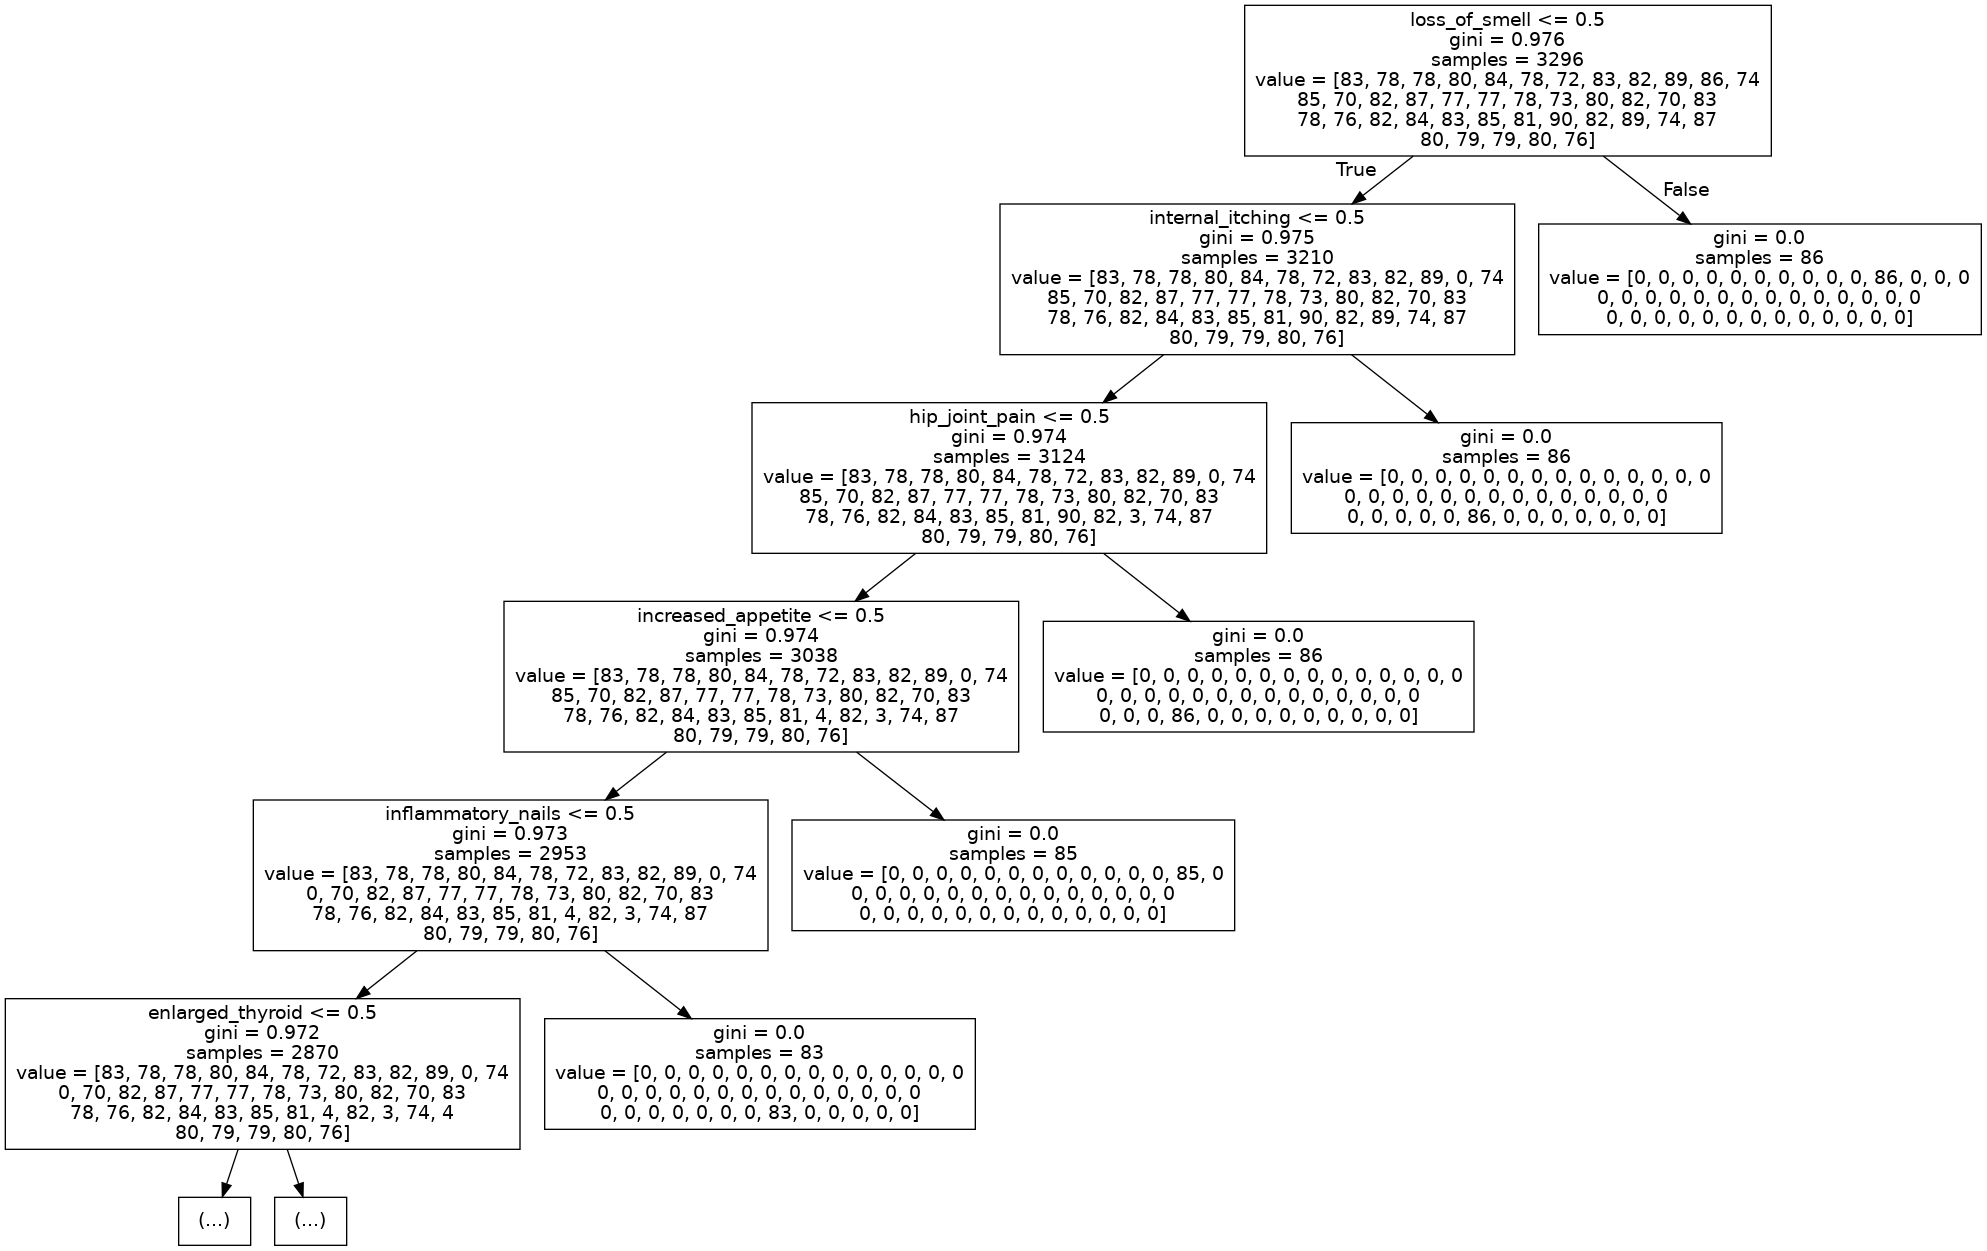

In [104]:
from IPython.display import Image
Image(filename='tree-top5.png')

In [105]:
feature_dict = {}
for i,f in enumerate(features):
    feature_dict[f] = i

In [106]:
feature_dict['internal_itching']

93

In [107]:
sample_x = [i/52 if i==52 else i*0 for i in range(len(features))]
cols = list(data.columns) 
print(cols.index('skin_rash'))

1


This means predicting the disease where the only symptom is redness_of_eyes.

In [108]:
sample_x = np.array(sample_x).reshape(1,len(sample_x))

In [109]:
dt.predict(sample_x)

/home/aroooon/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array(['Dimorphic hemmorhoids(piles)'], dtype=object)

In [110]:
dt.predict_proba(sample_x)

/home/aroooon/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([[0.        , 0.        , 0.        , 0.11764706, 0.        ,
        0.11764706, 0.        , 0.11764706, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.17647059, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.17647059, 0.        , 0.        , 0.17647059, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.11764706,
        0.        ]])

In [111]:
len(sample_x)

1

In [112]:
symptoms = ['skin_rash','itching','nodal_skin_eruptions','increased_appetite','irritability']
ipt = [0 for i in range(len(features))]
for s in symptoms:
  ipt[cols.index(s)]=1
ipt = np.array([ipt])
print(ipt)
print(dt.predict(ipt))
dt.predict_proba(ipt)

[[1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]
['Diabetes ']


/home/aroooon/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/home/aroooon/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0.]])